In [156]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [144]:
satelites = []
satelites.append(np.array([2000, 2000, 2000]))
satelites.append(np.array([2000, 1000, 1000]))
satelites.append(np.array([-2000, -1000, 1000]))
satelites.append(np.array([-2000, 1000, 1000]))
v = 1000

In [152]:
class GPS_simulation(object):
    def __init__(self, satelites):
        self.satelites = satelites
        self.time_satelites = 0
        self.time_diff = 10
        self.point_real = np.zeros(3)
        self.arrive_time = np.zeros(3)
    
    def get_info(self):
        arrive_time = []
        for sate in self.satelites:
            arrive_time.append(get_distance(sate, self.point_real)/v + self.time_satelites + self.time_diff)
        self.arrive_time = arrive_time
    
    @staticmethod
    def equation(solution, this):
        result = np.zeros(4)
        for idx, (sate, time) in enumerate(zip(this.satelites, this.arrive_time)):
            result[idx] = get_distance(sate, solution[:3]) - v*(time-solution[3]) 
        return result
    
    def get_location_time_diff(self):
        self.get_info()
        solution = fsolve(GPS_simulation.equation, x0=np.ones(4)*100, args=self)
        return solution

In [153]:
gps = GPS_simulation(satelites)

In [161]:
solution = gps.get_location_time_diff()

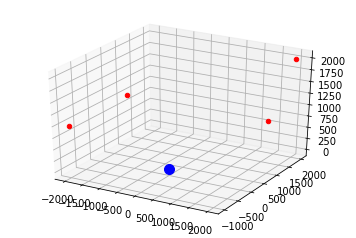

In [164]:
position = solution[:3]
time_diff = solution[3]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for satelite in satelites:
    ax.scatter(*satelite, c='red')
ax.scatter(*position, c='blue', s=100)